In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
x = pd.read_csv('../final/Final_x_dataframe_before_scaler.csv')
y = pd.read_csv('../final/Final_y_dataframe_before_scaler.csv')

In [7]:
x.drop('Unnamed: 0',axis=1,inplace=True)
y.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
x.shape

(59148, 44)

In [9]:
y.shape

(59148, 1)

In [124]:
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score, precision_score, recall_score,classification_report,mean_absolute_error,f1_score
import itertools
from sklearn.metrics import confusion_matrix
def metric(y_test,y_pred,x_train,y_train,model):
    test_acc = accuracy_score(y_test,y_pred)
    train_acc = model.score(x_train,y_train)
    precision=precision_score(y_test,y_pred,average='macro')
    recall =recall_score(y_test,y_pred,average='macro')
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    #F1_score = f1_score(y_test,y_pred,average='macro')
    print('test accuracy score : ',test_acc,"%")
    print('train accuracy score : ',train_acc,"%")
    print('precision score : ',precision,"%")
    print('recall score : ',recall,"%")
    print('Mean Squared Error : ',mse,"%")
    print('Mean Absolute Error : ',mae,"%")
    print('F_1 score : ',f1_score,"%")
    
    print("classification report")
    print(classification_report(y_test,y_pred))
    print("Confusion Matrix")
    conf_mat = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    fig1 = plt.figure(figsize=(7,6))
    plot_confusion_matrix(conf_mat, classes=y.value_counts().index.tolist(), title='Confusion matrix')
    return test_acc,train_acc,precision,recall,mse,mae,f1_score(y_test,y_pred,average='macro')
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        
    else:
        cm=cm
        

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### K-Nearest Neighbours

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#### Finding optimal k value

In [102]:
# For looping k values from 1 to 39
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

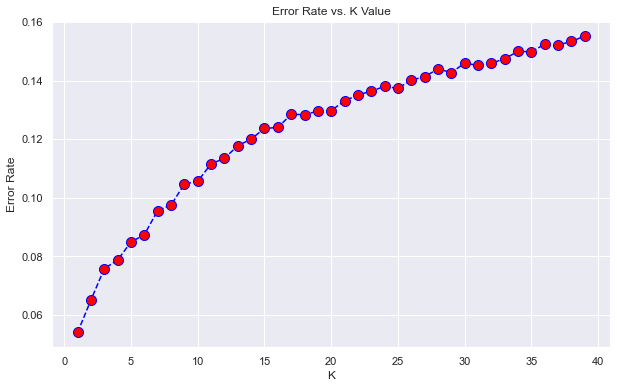

In [103]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40),error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [126]:
mean_acc = np.zeros(20)
for i in range(1,21):
      
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)

mean_acc

array([0.95, 0.93, 0.92, 0.92, 0.92, 0.91, 0.9 , 0.9 , 0.9 , 0.89, 0.89,
       0.89, 0.88, 0.88, 0.88, 0.88, 0.87, 0.87, 0.87, 0.87])

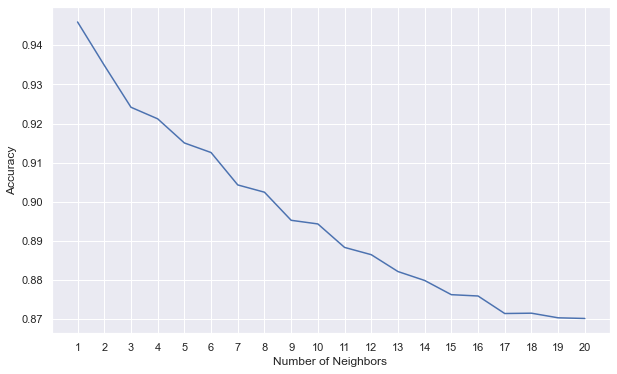

In [127]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

#### Using 1 nearest neighbour

In [104]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

In [105]:
print("Classification Report:")
print(classification_report(y_test, knn_predictions, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

   operating       0.98      0.98      0.98      2958
    acquired       0.94      0.89      0.91      2958
         ipo       0.98      0.98      0.98      2957
      closed       0.89      0.94      0.92      2957

    accuracy                           0.95     11830
   macro avg       0.95      0.95      0.95     11830
weighted avg       0.95      0.95      0.95     11830



test accuracy score :  0.945984784446323 %
train accuracy score :  1.0 %
precision score :  0.9464699176735005 %
recall score :  0.9459873695609574 %
Mean Squared Error :  0.2157227387996619 %
Mean Absolute Error :  0.10752324598478445 %
F_1 score :  <function f1_score at 0x000002E9C67869D0> %
classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2958
           1       0.94      0.89      0.91      2958
           2       0.98      0.98      0.98      2957
           3       0.89      0.94      0.92      2957

    accuracy                           0.95     11830
   macro avg       0.95      0.95      0.95     11830
weighted avg       0.95      0.95      0.95     11830

Confusion Matrix


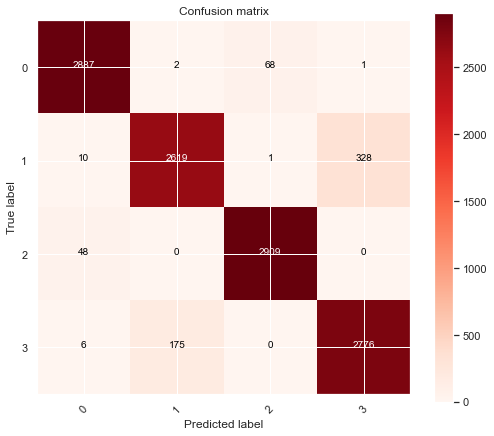

In [111]:
test_acc,train_acc,precision,recall,mse,maf,f1_score = metric(y_test,knn_predictions,x_train,y_train,knn)


In [112]:
from sklearn.model_selection import GridSearchCV

In [137]:
leaf_size = list(range(1,50))
n_neighbors = [1,2]
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

clf = GridSearchCV(knn, hyperparameters, cv=3,n_jobs=-1)
best_model = clf.fit(x_train,y_train)

In [138]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [139]:
best_model.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

In [140]:
Grid_best_model = KNeighborsClassifier(leaf_size=1,n_neighbors=1,p=1)
Grid_best_model

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [144]:
Grid_best_model.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [141]:
KNN_grid_search_cv = pd.DataFrame(data=best_model.cv_results_)
KNN_grid_search_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043963,2.407694e-03,38.622739,0.273434,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.933050,0.932036,0.933363,0.932816,0.000566,1
1,0.030330,3.612187e-03,6.291733,0.082125,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.930324,0.927978,0.931334,0.929879,0.001406,50
2,0.032908,1.394589e-03,40.465817,1.534260,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.925062,0.922779,0.921506,0.923116,0.001471,99
3,0.031708,4.155635e-04,7.605750,0.300992,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.919609,0.914854,0.916307,0.916924,0.001990,148
4,0.056848,1.389101e-02,41.062613,0.672075,2,1,1,"{'leaf_size': 2, 'n_neighbors': 1, 'p': 1}",0.933050,0.932036,0.933363,0.932816,0.000566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.028922,4.899036e-07,4.059015,0.019229,48,2,2,"{'leaf_size': 48, 'n_neighbors': 2, 'p': 2}",0.919609,0.914854,0.916307,0.916924,0.001990,148
192,0.029254,4.699655e-04,25.680059,0.447979,49,1,1,"{'leaf_size': 49, 'n_neighbors': 1, 'p': 1}",0.933050,0.932036,0.933363,0.932816,0.000566,1
193,0.030585,2.350783e-03,4.088066,0.058907,49,1,2,"{'leaf_size': 49, 'n_neighbors': 1, 'p': 2}",0.930324,0.927978,0.931334,0.929879,0.001406,50
194,0.029255,4.701341e-04,23.420421,0.214299,49,2,1,"{'leaf_size': 49, 'n_neighbors': 2, 'p': 1}",0.925062,0.922779,0.921506,0.923116,0.001471,99


In [142]:
KNN_grid_search_cv.to_csv("final/KNN_grid_search_cv.csv")

In [145]:
y_pred = Grid_best_model.predict(x_test)


test accuracy score :  0.9457311918850381 %
train accuracy score :  1.0 %
precision score :  0.9464662878652365 %
recall score :  0.9457340199382495 %
Mean Squared Error :  0.2183431952662722 %
Mean Absolute Error :  0.10828402366863905 %
F_1 score :  <function f1_score at 0x000002E9C67869D0> %
classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2958
           1       0.94      0.88      0.91      2958
           2       0.98      0.98      0.98      2957
           3       0.89      0.94      0.91      2957

    accuracy                           0.95     11830
   macro avg       0.95      0.95      0.95     11830
weighted avg       0.95      0.95      0.95     11830

Confusion Matrix


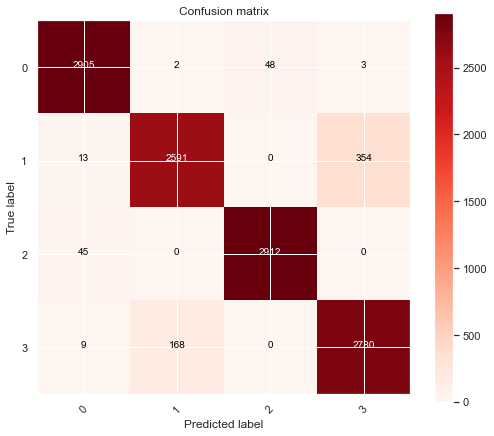

In [146]:
test_acc_grid,train_acc_grid,precision_grid,recagrid,mse_grid,mae_grid,f1_score_grid = metric(y_test,y_pred,x_train,y_train,Grid_best_model)

In [153]:
grid_params = { 'n_neighbors' : [1],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(leaf_size=1,n_neighbors=1,p=1), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [154]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [155]:
g_res.best_score_

0.9328162759762808

In [156]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

In [157]:
knn_2 = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'brute',metric = 'minkowski',leaf_size=1,p=1)
knn_2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=1, p=1)

In [163]:
y_pred_2 = knn_2.predict(x_test)

test accuracy score :  0.9457311918850381 %
train accuracy score :  1.0 %
precision score :  0.9464662878652365 %
recall score :  0.9457340199382495 %
Mean Squared Error :  0.2183431952662722 %
Mean Absolute Error :  0.10828402366863905 %
F_1 score :  <function f1_score at 0x000002E9C67869D0> %
classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2958
           1       0.94      0.88      0.91      2958
           2       0.98      0.98      0.98      2957
           3       0.89      0.94      0.91      2957

    accuracy                           0.95     11830
   macro avg       0.95      0.95      0.95     11830
weighted avg       0.95      0.95      0.95     11830

Confusion Matrix


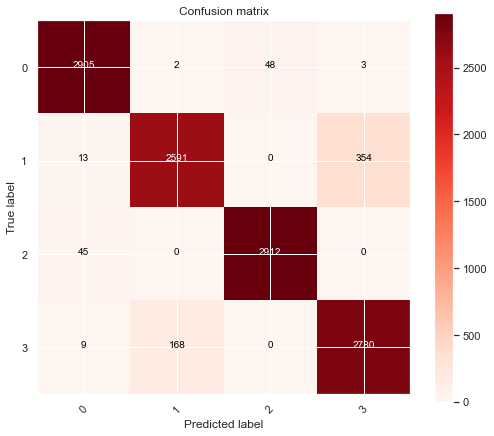

In [164]:
test_acc_grid_knn_2,train_acc_grid_knn_2,precision_grid_knn_2,recagrid_knn_2,mse_grid_knn_2,mae_grid_knn_2,f1_score_grid_knn_2 = metric(y_test,y_pred_2,x_train,y_train,knn_2)